In [0]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

W0706 09:42:43.479120 140150589425536 deprecation.py:323] From <ipython-input-2-02b855d8d526>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0706 09:42:43.481033 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0706 09:42:43.482201 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0706 09:42:43.780765 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0706 09:42:43.783689 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0706 09:42:43.844627 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
import matplotlib.pyplot as plt
import numpy as np

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


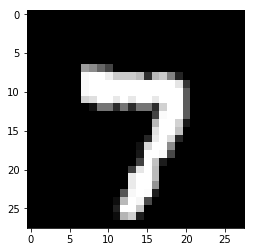

In [4]:
inp_batch, target_batch = mnist.train.next_batch(10)
x, y = inp_batch[0] , target_batch[0]
x = np.reshape(x,(28,28))
plt.imshow(x, cmap = "gray")
print(y)

In [5]:
inp_tensor = tf.placeholder(tf.float32, (None, 784))
W1 = tf.Variable(tf.zeros((784,10)))
b1 = tf.Variable(tf.zeros((10))) 
pred = tf.nn.softmax(tf.matmul(inp_tensor,W1)+b1)

label_tensor = tf.placeholder(tf.float32,(None,10))

#dont forget the minus!
loss = tf.reduce_mean(tf.reduce_sum(-tf.log(tf.clip_by_value(pred,1e-10,1)) * label_tensor, reduction_indices = [1]))

opt = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

sess = tf.Session()

tf.global_variables_initializer().run(session = sess)





W0706 09:42:44.569021 140150589425536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
for i in range(100):
  inp_batch , label_batch = mnist.train.next_batch(128)
  sess.run(opt, feed_dict = {inp_tensor: inp_batch, label_tensor: label_batch})
  
  test_inp_batch, test_label_batch = mnist.test.images , mnist.test.labels
  
  train_loss = sess.run(loss, feed_dict = {inp_tensor: inp_batch, label_tensor : label_batch})
  test_loss = sess.run(loss, feed_dict = {inp_tensor: test_inp_batch, label_tensor : test_label_batch})
  
  
  correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(label_tensor,1))
  acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
  
  
  
  test_accuracy = sess.run(acc, feed_dict = {inp_tensor: mnist.test.images, label_tensor: mnist.test.labels})
  
  if(i%20 == 0):
    print("Iteration: {0}  Train Loss: {1} Test Loss: {2} Accuracy: {3}".format(i,train_loss,test_loss,test_accuracy))
    


Iteration: 0  Train Loss: 1.6819040775299072 Test Loss: 1.9604308605194092 Accuracy: 0.29910001158714294
Iteration: 20  Train Loss: 0.5398341417312622 Test Loss: 0.6169247627258301 Accuracy: 0.8303999900817871
Iteration: 40  Train Loss: 0.44561585783958435 Test Loss: 0.4777100682258606 Accuracy: 0.8741999864578247
Iteration: 60  Train Loss: 0.4636496603488922 Test Loss: 0.4178853929042816 Accuracy: 0.8877999782562256
Iteration: 80  Train Loss: 0.3715023994445801 Test Loss: 0.4207342267036438 Accuracy: 0.8812000155448914


In [18]:
#Conf Matrix


preds = sess.run(pred, feed_dict = {inp_tensor: mnist.test.images, label_tensor: mnist.test.labels})

print(np.shape(preds))
print(np.shape(mnist.test.labels))

print(np.shape([np.where(r==1) for r in preds]))
numeric_pred = [np.where(r==1)[0][0] for r in preds]
numeric_lab = [np.where(r==1) for r in mnist.test.labels]


print(np.shape(numeric_pred))
print(np.shape(numeric_lab))

numeric_pred = np.reshape(numeric_pred,(10000))
numeric_lab = np.reshape(numeric_lab,(10000))


tf.math.confusion_matrix(numeric_lab, numeric_pred,dtype = tf.dtypes.float32, num_classes = 10)

(10000, 10)
(10000, 10)
(10000, 1, 0)


IndexError: ignored